<a href="https://colab.research.google.com/github/YavuzCanAtalay/DSA210_TermProject/blob/main/ProjectOutcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Welcome to the DSA210 Term Project on Google Colab***




This notebook is dedicated to the data extraction, visualization, and hypothesis testing required for the DSA210 term project. Here, The goal is to analyze and evaluate extracted data to determine whether the null hypotheses should be rejected or should not be rejected. Detailed explanations will be given under each implementations but for now, here is a layout of the project.

# *Data Extraction*
We used three different methods to collect the required data for analysis:


1.   Steam API Key

  The Steam API was employed to retrieve key details such as:

  *   Total playtime for each game.
  *   The last time each game was played.
  *   Game names.


2.   Steam Purchase History, provided a complete record of spending patterns

  *   Money spent on each game.
  *   In-game purchases, expansions, and other transactions.
  *   If a game is refuned or not

  This history provided a complete record of spending patterns.


3.  SteamDB, a third-party platform with extensive game-related details, was used to gather:

  *   Overall game ratings from a global perspective.
  *   Game categories for deeper analysis.
  



Data extraction process conducted where each result is saved under a related file. After all extracions are finished, they are collected under one csv file  to enable efficient reuse in visualizations and hypothesis testing.

# *Analysis and Hypothesis Testing*
General Layout

A preliminary overview of the data is provided using various visualizations to observe the structures.

- A donut chart to display proportion of each category over all category

- Two histogram to illustrate:
  -  total paid amount for each category
  -  total play time for each category
- A grouped bar chart to visualise play time proportion(item's play time / all play time) and money spent proportion(item's money spend / all money spend) for each item

# *Hypothesis Testing*

For each hypothesis(there is three):

We used scatter plots with a regression line and zoomed-in view placed inside illustration. A linear regression model is applied to calculate the p-value. Based on the p-value(alpha = 0.05), we decide whether to reject or fail to reject the null hypothesis.
Additionally, the correlation coefficient is calculated to assess the strength and direction of relationships between variables.




In [14]:
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import linregress
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

These are all libraries and tools we are gonna use during the project

In [15]:
# @title PLAY TIME DATA EXTRACTION

raw_data = {
  "response": {
    "game_count": 71,
    "games": [
      {
        "appid": 550,
        "name": "Left 4 Dead 2",
        "playtime_forever": 376,
        "img_icon_url": "7d5a243f9500d2f8467312822f8af2a2928777ed",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 376,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1720901990,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 204360,
        "name": "Castle Crashers",
        "playtime_forever": 269,
        "img_icon_url": "9b7625f9b70f103397fd0416fd92abb583db8659",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 269,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1721568595,
        "playtime_disconnected": 1
      },
      {
        "appid": 242760,
        "name": "The Forest",
        "playtime_forever": 1357,
        "img_icon_url": "3a6847f6ac5879e48531db52261771d5e22904ac",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 219,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1591718760,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 224540,
        "name": "Ace of Spades",
        "playtime_forever": 357,
        "img_icon_url": "78082d2c84f67cfb7bd75e9b42c7c412259608bb",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1530369567,
        "playtime_disconnected": 0
      },
      {
        "appid": 218620,
        "name": "PAYDAY 2",
        "playtime_forever": 7143,
        "img_icon_url": "a6abc0d0c1e79c0b5b0f5c8ab81ce9076a542414",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 1668,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1579615051,
        "playtime_disconnected": 0
      },
      {
        "appid": 236850,
        "name": "Europa Universalis IV",
        "playtime_forever": 15941,
        "img_icon_url": "2553e828486183a4f5d5eb33036a95f07c698ded",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 15941,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1679251739,
        "playtime_disconnected": 0
      },
      {
        "appid": 207140,
        "name": "SpeedRunners",
        "playtime_forever": 2,
        "img_icon_url": "65cfa21149c415430fe36d83c23e079e6db476cc",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 2,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1660069404,
        "playtime_disconnected": 0
      },
      {
        "appid": 252950,
        "name": "Rocket League",
        "playtime_forever": 0,
        "img_icon_url": "9ad6dd3d173523354385955b5fb2af87639c4163",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 264710,
        "name": "Subnautica",
        "playtime_forever": 380,
        "img_icon_url": "8a14ceef6e230330a916d7a6324b8c52d464d569",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 380,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1599826688,
        "playtime_disconnected": 0
      },
      {
        "appid": 271590,
        "name": "Grand Theft Auto V",
        "playtime_forever": 4840,
        "img_icon_url": "1e72f87eb927fa1485e68aefaff23c7fd7178251",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 835,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1591216322,
        "content_descriptorids": [5],
        "playtime_disconnected": 0
      },
      {
        "appid": 246620,
        "name": "Plague Inc: Evolved",
        "playtime_forever": 115,
        "img_icon_url": "9e39dcfd5a300732c16111b268853ef11a0ba4d0",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 3,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1604082730,
        "playtime_disconnected": 0
      },
      {
        "appid": 304050,
        "name": "Trove",
        "playtime_forever": 0,
        "img_icon_url": "76b62601bb6f0551c415697fe92a6653340f4a5e",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 304930,
        "name": "Unturned",
        "playtime_forever": 1320,
        "img_icon_url": "e18009fb628b35953826efe47dc3be556b689f4c",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1460832815,
        "playtime_disconnected": 0
      },
      {
        "appid": 312530,
        "name": "Duck Game",
        "playtime_forever": 68,
        "img_icon_url": "d539148e7970b82733bfc78d595b41465fd09275",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 68,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1585601202,
        "playtime_disconnected": 0
      },
      {
        "appid": 291480,
        "name": "Warface: Clutch",
        "playtime_forever": 0,
        "img_icon_url": "66ef308279871d99ca776d4602bf02a354570368",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 322170,
        "name": "Geometry Dash",
        "playtime_forever": 515,
        "img_icon_url": "7fb2e71773468dbd98d56c733b604c92f5ab0ad4",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 271,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1587204508,
        "playtime_disconnected": 0
      },
      {
        "appid": 730,
        "name": "Counter-Strike 2",
        "playtime_forever": 39993,
        "img_icon_url": "8dbc71957312bbd3baea65848b545be9eae2a355",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 1675,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1695989776,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 282070,
        "name": "This War of Mine",
        "playtime_forever": 301,
        "img_icon_url": "38ad6fd10e2b89ab24e8013584ece7961bebe086",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1547322503,
        "content_descriptorids": [5],
        "playtime_disconnected": 0
      },
      {
        "appid": 361420,
        "name": "ASTRONEER",
        "playtime_forever": 785,
        "img_icon_url": "18ef632a152a69a8fb4f62c074cd50aa15d3bf33",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 162,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1585674524,
        "playtime_disconnected": 0
      },
      {
        "appid": 265930,
        "name": "Goat Simulator",
        "playtime_forever": 16,
        "img_icon_url": "edf6c28b83d5fc221338ff71d01caa11d11d3b50",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1484488871,
        "has_leaderboards": "True",
        "playtime_disconnected": 0
      },
      {
        "appid": 322330,
        "name": "Don't Starve Together",
        "playtime_forever": 633,
        "img_icon_url": "a80aa6cff8eebc1cbc18c367d9ab063e1553b0ee",
        "playtime_windows_forever": 371,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1687121166,
        "playtime_disconnected": 0
      },
      {
        "appid": 381210,
        "name": "Dead by Daylight",
        "playtime_forever": 3345,
        "img_icon_url": "aa152097a700fd6f4707397ce41794ea30874790",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 958,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1660500357,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 291550,
        "name": "Brawlhalla",
        "playtime_forever": 21261,
        "img_icon_url": "c43fac31b8bf8821764603a14d09412bc3d45f66",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 21261,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1725651497,
        "playtime_disconnected": 0
      },
      {
        "appid": 389430,
        "name": "Knight Online",
        "playtime_forever": 28,
        "img_icon_url": "908f553172ee3dc062e69dafd92bdcafb4f69888",
        "playtime_windows_forever": 28,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1658869532,
        "playtime_disconnected": 0
      },
      {
        "appid": 394360,
        "name": "Hearts of Iron IV",
        "playtime_forever": 88,
        "img_icon_url": "67b15e2336311b4b4f1eb5c802af0c0dbe644195",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 88,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1607193823,
        "playtime_disconnected": 0
      },
      {
        "appid": 397900,
        "name": "Business Tour - Online Multiplayer Board Game",
        "playtime_forever": 1511,
        "img_icon_url": "b6ce52a576e99f54c5d18f675540b9c3ee70ed47",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 41,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1592568881,
        "playtime_disconnected": 0
      },
      {
        "appid": 349040,
        "name": "NARUTO SHIPPUDEN: Ultimate Ninja STORM 4",
        "playtime_forever": 1085,
        "img_icon_url": "bb5c2a74c919d172b4a40c85591aaffd101d26ef",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 47,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1606496562,
        "playtime_disconnected": 0
      },
      {
        "appid": 359550,
        "name": "Tom Clancy's Rainbow Six Siege",
        "playtime_forever": 15743,
        "img_icon_url": "624745d333ac54aedb1ee911013e2edb7722550e",
        "playtime_windows_forever": 6064,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1692486656,
        "playtime_disconnected": 0
      },
      {
        "appid": 623990,
        "name": "Tom Clancy's Rainbow Six Siege - Test Server",
        "playtime_forever": 0,
        "img_icon_url": "20deaf466474f76f2ffdb345fe56f40fe3af74c0",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 433340,
        "name": "Slime Rancher",
        "playtime_forever": 367,
        "img_icon_url": "814236b2c3a100cf76b00390585f351708e4c1e4",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1548583334,
        "playtime_disconnected": 0
      },
      {
        "appid": 535760,
        "name": "Unforgiving Trials: The Space Crusade",
        "playtime_forever": 0,
        "img_icon_url": "45c6ac908b10f4b834e95f71c34f3008fb380569",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 544730,
        "name": "Catan Universe",
        "playtime_forever": 25,
        "img_icon_url": "8cd29d84f760481a824955e880ee5b86b7d2b4dc",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 25,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1675100381,
        "playtime_disconnected": 0
      },
      {
        "appid": 548430,
        "name": "Deep Rock Galactic",
        "playtime_forever": 818,
        "img_icon_url": "e033e23c29a192a17c16a7645a2b423ac64ff447",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 818,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1687691577,
        "has_leaderboards": "True",
        "content_descriptorids": [5],
        "playtime_disconnected": 0
      },
      {
        "appid": 578080,
        "name": "PUBG: BATTLEGROUNDS",
        "playtime_forever": 15030,
        "img_icon_url": "609f27278aa70697c13bf99f32c5a0248c381f9d",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 44,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1588096843,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 460930,
        "name": "Tom Clancy's Ghost Recon® Wildlands",
        "playtime_forever": 1417,
        "img_icon_url": "ddd459159befc6a8cd6c4cb0e2a13c2fd2f8b065",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 13,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1594382408,
        "playtime_disconnected": 0
      },
      {
        "appid": 577800,
        "name": "NBA 2K18",
        "playtime_forever": 11222,
        "img_icon_url": "bd818ca69f8b92f0f159f407a3eda68a22e8817b",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1528471310,
        "playtime_disconnected": 0
      },
      {
        "appid": 632360,
        "name": "Risk of Rain 2",
        "playtime_forever": 1115,
        "img_icon_url": "0b809ac6f25e6570fecae5fc47bca0139a7bf70c",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 1115,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1725721269,
        "playtime_disconnected": 0
      },
      {
        "appid": 646270,
        "name": "60 Parsecs!",
        "playtime_forever": 6,
        "img_icon_url": "033862bceecdc058a47d488f0be480029342d49f",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 6,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1593873914,
        "playtime_disconnected": 0
      },
      {
        "appid": 674940,
        "name": "Stick Fight: The Game",
        "playtime_forever": 123,
        "img_icon_url": "28bc7ba8952d488e01e7136126cbbc3b42ee443a",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 123,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1659728337,
        "playtime_disconnected": 0
      },
      {
        "appid": 774861,
        "name": "Project Winter",
        "playtime_forever": 26,
        "img_icon_url": "c6991b5658dcefeb09f867784b8b4780f4ad2d7c",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 26,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1660045020,
        "content_descriptorids": [5],
        "playtime_disconnected": 0
      },
      {
        "appid": 304390,
        "name": "For Honor",
        "playtime_forever": 1202,
        "img_icon_url": "64dd8eca34f0b5faeda135f057da1973806852f2",
        "playtime_windows_forever": 24,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1606390991,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 654310,
        "name": "For Honor - Public Test",
        "playtime_forever": 0,
        "img_icon_url": "64dd8eca34f0b5faeda135f057da1973806852f2",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 841370,
        "name": "NBA 2K19",
        "playtime_forever": 8938,
        "img_icon_url": "12b792d209b633163c2179bccbcec0e76f2865cd",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1563392634,
        "playtime_disconnected": 0
      },
      {
        "appid": 880940,
        "name": "Pummel Party",
        "playtime_forever": 772,
        "img_icon_url": "0e2e222010d009ca46b575cc5c53a23250434341",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 772,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1721248046,
        "playtime_disconnected": 0
      },
      {
        "appid": 714010,
        "name": "Aimlabs",
        "playtime_forever": 0,
        "img_icon_url": "15347de11efc127539c388e585af9e92d10d5189",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "has_leaderboards": "True",
        "playtime_disconnected": 0
      },
      {
        "appid": 897410,
        "name": "Esports Life Tycoon",
        "playtime_forever": 865,
        "img_icon_url": "9c352ba9fa1c6dd27af556298a7344060417c93b",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 155,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1656168542,
        "playtime_disconnected": 0
      },
      {
        "appid": 945360,
        "name": "Among Us",
        "playtime_forever": 1368,
        "img_icon_url": "b82c3f46da8f3c918e1c9e0d18bd6fa8fcef6801",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 1368,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1688683897,
        "playtime_disconnected": 0
      },
      {
        "appid": 1012880,
        "name": "60 Seconds! Reatomized",
        "playtime_forever": 627,
        "img_icon_url": "e008d567f867241727ef6b65003cb0b40d6b0da9",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 627,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1594489977,
        "playtime_disconnected": 0
      },
      {
        "appid": 761890,
        "name": "Albion Online",
        "playtime_forever": 93,
        "img_icon_url": "c58d1e42e59a9c6cc57c8da69d944b37ba45a0e2",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 93,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1659029528,
        "playtime_disconnected": 0
      },
      {
        "appid": 1097150,
        "name": "Fall Guys",
        "playtime_forever": 1053,
        "img_icon_url": "6c027709b9eb1417c993bc7d513b97b232002368",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 1053,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1688752093,
        "playtime_disconnected": 0
      },
      {
        "appid": 1085660,
        "name": "Destiny 2",
        "playtime_forever": 56758,
        "img_icon_url": "fce050d63f0a2f8eb51b603c7f30bfca2a301549",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 56758,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1712781645,
        "playtime_disconnected": 1
      },
      {
        "appid": 1121640,
        "name": "The Wandering Village",
        "playtime_forever": 1051,
        "img_icon_url": "1afcc38a5003e351efa1acfa45254c570eef7cc2",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 1051,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1721497148,
        "playtime_disconnected": 0
      },
      {
        "appid": 1128810,
        "name": "RISK: Global Domination",
        "playtime_forever": 779,
        "img_icon_url": "ecc6f7301e88a88e93edec1a3d4ddcc7ec9c5335",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 779,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1661895407,
        "playtime_disconnected": 0
      },
      {
        "appid": 1172470,
        "name": "Apex Legends",
        "playtime_forever": 0,
        "img_icon_url": "070902d2389878ac4bf29efb5b92832c60bdf24e",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 1145360,
        "name": "Hades",
        "playtime_forever": 274,
        "img_icon_url": "8a3fca36a00883e8066263ad35dd15d77a1f9abc",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 274,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1659615231,
        "playtime_disconnected": 0
      },
      {
        "appid": 1222700,
        "name": "A Way Out",
        "playtime_forever": 0,
        "img_icon_url": "ac36b7d06c117d34c204166c3120e15910ef2b8b",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "content_descriptorids": [1, 2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 1436990,
        "name": "Feign",
        "playtime_forever": 1338,
        "img_icon_url": "2d6be288a42a664f088d163dab298ec32029afc4",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 1338,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1688683473,
        "playtime_disconnected": 0
      },
      {
        "appid": 1557740,
        "name": "ROUNDS",
        "playtime_forever": 714,
        "img_icon_url": "f087183f42804b06bcd59b47536c23b398061fc1",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 714,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1721160114,
        "playtime_disconnected": 3
      },
      {
        "appid": 1599600,
        "name": "PlateUp!",
        "playtime_forever": 708,
        "img_icon_url": "8ab51cc26c5b54c8858bf95538d71f728b460611",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 708,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1721159049,
        "playtime_disconnected": 0
      },
      {
        "appid": 1568590,
        "name": "Goose Goose Duck",
        "playtime_forever": 0,
        "img_icon_url": "3b802d5010d6d5d72c93a8565b260c6042cc9390",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 1966720,
        "name": "Lethal Company",
        "playtime_forever": 749,
        "img_icon_url": "8393f321a62a9ef0be762c81565d2caea4fb7da6",
        "playtime_windows_forever": 749,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1712789080,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 2074920,
        "name": "The First Descendant",
        "playtime_forever": 0,
        "img_icon_url": "a07ab51050a8e03993b1860ae929da51287f283b",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 2139460,
        "name": "Once Human",
        "playtime_forever": 0,
        "img_icon_url": "e1c29227c162232120c15edcf282df61ee35f091",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 2225070,
        "name": "Trackmania",
        "playtime_forever": 0,
        "img_icon_url": "4b0f99cb45eef02df25bee27eb3d52052e8f8b55",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 2357570,
        "name": "Overwatch® 2",
        "playtime_forever": 0,
        "img_icon_url": "da42bd294c941d5947b1bc2c2b2efa1313d36a91",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 1203220,
        "name": "NARAKA: BLADEPOINT",
        "playtime_forever": 0,
        "img_icon_url": "8055e7baa81ce2084d7daa42233983967956abb0",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 0,
        "playtime_disconnected": 0
      },
      {
        "appid": 2567870,
        "name": "Chained Together",
        "playtime_forever": 115,
        "img_icon_url": "231b8f624ff26721431fe5749fa5ab5bccd75ff4",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 115,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1721142894,
        "playtime_disconnected": 0
      },
      {
        "appid": 2881650,
        "name": "Content Warning",
        "playtime_forever": 169,
        "img_icon_url": "513cf7f2e22c94f4372369e29bffccc4c239e9c0",
        "playtime_windows_forever": 169,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1713039883,
        "playtime_disconnected": 0
      },
      {
        "appid": 2016590,
        "name": "Dark and Darker",
        "playtime_forever": 339,
        "img_icon_url": "9dfa7ea1b799b795ab5795e8251b17e35ef2b8d8",
        "playtime_windows_forever": 339,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1724408302,
        "content_descriptorids": [2, 5],
        "playtime_disconnected": 0
      },
      {
        "appid": 440,
        "name": "Team Fortress 2",
        "playtime_forever": 44,
        "img_icon_url": "e3f595a92552da3d664ad00277fad2107345f743",
        "has_community_visible_stats": "True",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1472912591,
        "has_leaderboards": "True",
        "playtime_disconnected": 0
      },
      {
        "appid": 570,
        "name": "Dota 2",
        "playtime_forever": 565,
        "img_icon_url": "0bbb630d63262dd66d2fdd0f7d37e8661a410075",
        "playtime_windows_forever": 0,
        "playtime_mac_forever": 0,
        "playtime_linux_forever": 0,
        "playtime_deck_forever": 0,
        "rtime_last_played": 1463252004,
        "content_descriptorids": [5],
        "playtime_disconnected": 0
      }
    ]
  }
}

games = raw_data["response"]["games"]

desired_fields = ["appid","name","playtime_forever","img_icon_url","rtime_last_played"]
simplified_data = []
last_time_played_data = []


for game in games:

  simplified_entry = {field:game[field] for field in desired_fields}
  simplified_data.append(simplified_entry)
  readable_date = datetime.datetime.utcfromtimestamp(game["rtime_last_played"]).strftime('%Y-%m-%d %H:%M:%S')
  last_time_played_data.append(readable_date)

game_num = 1

for data in simplified_data:
    print(f"Game {game_num} .")
    print(f"Game name is '{data['name']}'.")

    if(data["playtime_forever"] == 0):
      print(f"Game was never played")

    else:
      print(f"It was played for {data['playtime_forever']} minutes.")
      print(f"last play time -> {last_time_played_data[game_num - 1]}.")

    print(f"In case you need for more research: \ngame's app ID-> {data['appid']} \nimg_icon_url -> {data['img_icon_url']}")
    print("-" * 50)
    game_num += 1





Game 1 .
Game name is 'Left 4 Dead 2'.
It was played for 376 minutes.
last play time -> 2024-07-13 20:19:50.
In case you need for more research: 
game's app ID-> 550 
img_icon_url -> 7d5a243f9500d2f8467312822f8af2a2928777ed
--------------------------------------------------
Game 2 .
Game name is 'Castle Crashers'.
It was played for 269 minutes.
last play time -> 2024-07-21 13:29:55.
In case you need for more research: 
game's app ID-> 204360 
img_icon_url -> 9b7625f9b70f103397fd0416fd92abb583db8659
--------------------------------------------------
Game 3 .
Game name is 'The Forest'.
It was played for 1357 minutes.
last play time -> 2020-06-09 16:06:00.
In case you need for more research: 
game's app ID-> 242760 
img_icon_url -> 3a6847f6ac5879e48531db52261771d5e22904ac
--------------------------------------------------
Game 4 .
Game name is 'Ace of Spades'.
It was played for 357 minutes.
last play time -> 2018-06-30 14:39:27.
In case you need for more research: 
game's app ID-> 224540 

This code extracts, simplifies, and displays relevant data about games from the raw. Data set is in JSON structure with informations about games such as their names, playtime_forever and rtime_last_played. This code extracts only necessary information from the raw data and simplfy them. After data extraction, records are recorded under a csv file and uploaded into gitHub repository. You can check output from the code above if you desire.

In [16]:
# @title Money paid for each game (TL) Data Extraction

# Load the CSV file
data_url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/SteamPurchaseHistoryRAW.csv"
df = pd.read_csv(data_url)

# Exchange rates for each year
year_rates = {
    2015: 3.0,
    2016: 3.0,
    2017: 3.5,
    2018: 5.0,
    2019: 5.5,
    2020: 7.5,
    2021: 9.0,
    2022: 16.0,
    2023: 26.0,
    2024: 32.0
}

# Default exchange rate
default_rate = 27.0

# Function to process the 'Total' column
def process_total(row):
    total_value = row['Total']
    date = row['Date']

    if pd.isna(total_value):
        return 0  # Skip missing values

    # Extract the year from the Date column
    try:
        year = int(str(date).split()[-1].replace(',', ''))
    except (AttributeError, ValueError):
        return 0  # Handle cases where date is missing or invalid
    exchange_rate = year_rates.get(year, default_rate)

    # Process total based on its type
    try:
        if isinstance(total_value, str) and 'USD' in total_value:
            # USD values (string format with $ and USD)
            amount = float(total_value.replace('$', '').replace('USD', '').strip())
            return amount * exchange_rate
        elif isinstance(total_value, str) and 'TL' in total_value:
            # TL values (string)
            amount = float(total_value.replace('TL', '').replace(',', '.').strip())
            return amount
        elif isinstance(total_value, float):  # USD as float
            return total_value * exchange_rate
        else:
            return 0  # Unknown format
    except Exception as e:
        print(f"Error processing row: {row}, Error: {e}")
        return 0

# Apply the function to calculate total amounts in TL
df['Total (TL)'] = df.apply(process_total, axis=1)

# Dictionary to track items and their costs
item_costs = {}
item_totals = {}

# Process each row
for _, row in df.iterrows():
    item_name = row['Items']
    transaction_type = row['Type']
    total_tl = row['Total (TL)']

    # Ensure item_name is a string before checking for "Wallet Credit"
    if isinstance(item_name, str) and "Wallet Credit" in item_name:
        continue

    if item_name not in item_costs:
        item_costs[item_name] = []
        item_totals[item_name] = 0

    if transaction_type in ['Purchase', 'In-Game Purchase']:
        item_costs[item_name].append(f"+{total_tl:.2f}")
        item_totals[item_name] += total_tl
    elif transaction_type == 'Refund':
        item_costs[item_name].append(f"-{total_tl:.2f}")
        item_totals[item_name] -= total_tl


# Display the item costs
for item, costs in item_costs.items():
    total = item_totals[item]
    if total == 0 and len(costs) > 0:  # Only include items with actual transactions
        if all(float(x.replace("+", "").replace("-", "")) == 0 for x in costs):
            continue
        print(f"Item: {item}\nRefunded\n")
    elif total != 0:  # If total is non-zero, display cost summary
        cost_summary = " ".join(costs)
        print(f"Item: {item}\nCost = {cost_summary}\nTotal Spent: {total:.2f} TL\n")

Item: Risk of Rain 2
Cost = +131.84
Total Spent: 131.84 TL

Item: Chained Together
Cost = +95.68
Total Spent: 95.68 TL

Item: Castle Crashers
Cost = +25.28
Total Spent: 25.28 TL

Item: PlateUp!
Cost = +113.92
Total Spent: 113.92 TL

Item: Supermarket Simulator
Refunded

Item: Content Warning
Cost = +143.68
Total Spent: 143.68 TL

Item: Lethal Company
Cost = +185.28
Total Spent: 185.28 TL

Item: The Wandering Village
Cost = +30.00
Total Spent: 30.00 TL

Item: ROUNDS
Cost = +5.75
Total Spent: 5.75 TL

Item: Destiny 2
Cost = +99.99 +74.99 +149.99 +49.99 +49.99
Total Spent: 424.95 TL

Item: Valheim
Refunded

Item: Don't Starve Together
Cost = -8.16 +15.60
Total Spent: 7.44 TL

Item: A Way Out
Cost = +39.80
Total Spent: 39.80 TL

Item: Counter-Strike 2
Cost = +45.50 +9.50 +9.50 +9.15 +9.15 +9.15 +18.30 +3.65 +3.65 +22.00 +9.15 +7.30 +7.30 +7.30 +9.15 +18.30 +9.15 +9.15 +9.15 +3.65 +3.65 +3.65 +9.15 +7.50 +6.95 +6.95 +6.95 +7.30 +14.60 +7.30 +5.85 +5.85 +7.30 +29.20 +7.30 +7.30 +7.30 +21.90 

The code begins by loading the CSV file containing Steam purchase history data using the specified URL. It utilizes the Pandas library to efficiently read, process, and extract the necessary information. The primary goal of the code is to analyze the Steam purchase history and calculate the total amount spent on each game, including in-game purchases and expansions.

Due to a recent policy change by Steam, which shifted transactions in Turkey from TL to USD, the analysis required handling both currencies. This was necessary to ensure the extracted data remained accurate and consistent. To address this, the code pocess a predefined USD-to-TL conversion rate for each year. By converting all monetary values to TL, it eliminates unbalance caused by different currencies, resulting in harmonized and reliable data for visualization and analysis.

This approach ensures that the data extracted is both meaningful and directly comparable, enabling more precise conclusions about spending patterns across games.

In [17]:
# @title Money paid (USD) Data Extraction

# Load the CSV file
data_url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/SteamPurchaseHistoryRAW.csv"
df = pd.read_csv(data_url)

# Exchange rates for each year
year_rates = {
    2015: 3.0,
    2016: 3.0,
    2017: 3.5,
    2018: 5.0,
    2019: 5.5,
    2020: 7.5,
    2021: 9.0,
    2022: 16.0,
    2023: 26.0,
    2024: 32.0
}

# Exchange rates for each year
year_rates = {
    2015: 3.0,
    2016: 3.0,
    2017: 3.5,
    2018: 5.0,
    2019: 5.5,
    2020: 7.5,
    2021: 9.0,
    2022: 16.0,
    2023: 26.0,
    2024: 32.0
}

# Default exchange rate
default_rate = 27.0

# Function to process the 'Total' column in USD
def process_total_usd(row):
    total_value = row['Total']
    date = row['Date']

    if pd.isna(total_value):
        return 0  # Skip missing values

    # Extract the year from the Date column
    try:
        year = int(str(date).split()[-1].replace(',', ''))
    except (AttributeError, ValueError):
        return 0  # Handle cases where date is missing or invalid
    exchange_rate = year_rates.get(year, default_rate)

    # Process total based on its type
    try:
        if isinstance(total_value, str) and 'USD' in total_value:
            # USD values (string format with $ and USD)
            amount = float(total_value.replace('$', '').replace('USD', '').strip())
            return amount  # Already in USD, no conversion needed
        elif isinstance(total_value, str) and 'TL' in total_value:
            # TL values (string)
            amount = float(total_value.replace('TL', '').replace(',', '.').strip())
            return amount / exchange_rate  # Convert TL to USD
        elif isinstance(total_value, float):  # USD as float
            return total_value  # Already in USD
        else:
            return 0  # Unknown format
    except Exception as e:
        print(f"Error processing row: {row}, Error: {e}")
        return 0

# Apply the function to calculate total amounts in USD
df['Total (USD)'] = df.apply(process_total_usd, axis=1)

# Dictionary to track items and their costs in USD
item_costs = {}
item_totals = {}

# Process each row
for _, row in df.iterrows():
    item_name = row['Items']
    transaction_type = row['Type']
    total_usd = row['Total (USD)']

    # Ensure item_name is a string before checking for "Wallet Credit"
    if isinstance(item_name, str) and "Wallet Credit" in item_name:
        continue

    if item_name not in item_costs:
        item_costs[item_name] = []
        item_totals[item_name] = 0

    if transaction_type in ['Purchase', 'In-Game Purchase']:
        item_costs[item_name].append(f"+{total_usd:.2f}")
        item_totals[item_name] += total_usd
    elif transaction_type == 'Refund':
        item_costs[item_name].append(f"-{total_usd:.2f}")
        item_totals[item_name] -= total_usd

# Display the item costs
for item, costs in item_costs.items():
    total = item_totals[item]
    if total == 0 and len(costs) > 0:  # Only include items with actual transactions
        if all(float(x.replace("+", "").replace("-", "")) == 0 for x in costs):
            continue
        print(f"Item: {item}\nRefunded\n")
    elif total != 0:  # If total is non-zero, display cost summary
        cost_summary = " ".join(costs)
        print(f"Item: {item}\nCost = {cost_summary}\nTotal Spent: {total:.2f} USD\n")

Item: Risk of Rain 2
Cost = +4.12
Total Spent: 4.12 USD

Item: Chained Together
Cost = +2.99
Total Spent: 2.99 USD

Item: Castle Crashers
Cost = +0.79
Total Spent: 0.79 USD

Item: PlateUp!
Cost = +3.56
Total Spent: 3.56 USD

Item: Supermarket Simulator
Refunded

Item: Content Warning
Cost = +4.49
Total Spent: 4.49 USD

Item: Lethal Company
Cost = +5.79
Total Spent: 5.79 USD

Item: The Wandering Village
Cost = +1.15
Total Spent: 1.15 USD

Item: ROUNDS
Cost = +0.22
Total Spent: 0.22 USD

Item: Destiny 2
Cost = +3.85 +2.88 +5.77 +1.92 +6.67
Total Spent: 21.09 USD

Item: Valheim
Refunded

Item: Don't Starve Together
Cost = -0.31 +4.46
Total Spent: 4.14 USD

Item: A Way Out
Cost = +1.53
Total Spent: 1.53 USD

Item: Counter-Strike 2
Cost = +1.75 +1.90 +1.90 +2.61 +2.61 +2.61 +5.23 +1.04 +1.04 +6.29 +2.61 +2.09 +2.09 +2.09 +2.61 +5.23 +2.61 +2.61 +2.61 +1.04 +1.04 +1.04 +2.61 +2.50 +2.32 +2.32 +2.32 +2.43 +4.87 +2.43 +1.95 +1.95 +2.43 +9.73 +2.43 +2.43 +2.43 +7.30 +4.87 +2.43 +4.87 +2.43 +2.4

This code serves the same purpose as the previous one, with a key difference: it converts all monetary values into USD. Given the high inflation rate of the Turkish Lira, analyzing data in TL could lead to skewed results, inaccurate outputs, and inconsistent p-values that do not accurately reflect the actual spending trends. As a result, all payments made in Turkish Lira were converted into USD.By standardizing the currency, we minimize possible errors occuring due to inconcistency resulting from inflation of Turkish lira in recent years.

In [18]:
# @title Rating of each game

# Extract and display ratings of each game
print("\nGame Ratings:")
game_ratings_url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/SteamDBGameDataRAW.csv"
game_ratings_df = pd.read_csv(game_ratings_url)
for index, row in game_ratings_df.iterrows():
    game_number = index + 1
    game_name = row['Name']
    rating = row['rating']
    print(f"{game_number}. {game_name}: {rating}")



Game Ratings:
1. Tom Clancy's Ghost Recon® Wildlands: 78.76%
2. A Way Out: 86.04%
3. Europa Universalis IV: 86.10%
4. Grand Theft Auto V: 86.58%
5. For Honor: 68.90%
6. Esports Life Tycoon: 59.70%
7. Tom Clancy's Rainbow Six Siege: 84.01%
8. Deep Rock Galactic: 96.15%
9. Dead by Daylight: 79.86%
10. Subnautica: 95.87%
11. NARUTO SHIPPUDEN: Ultimate Ninja STORM 4: 89.56%
12. The Wandering Village: 87.68%
13. Risk of Rain 2: 92.33%
14. The Forest: 94.66%
15. This War of Mine: 91.59%
16. Goat Simulator: 89.30%
17. PAYDAY 2: 88.85%
18. Slime Rancher: 96.54%
19. Hearts of Iron IV: 90.04%
20. Hades: 97.18%
21. Pummel Party: 87.31%
22. Plague Inc: Evolved: 92.80%
23. SpeedRunners: 92.07%
24. Castle Crashers: 94.78%
25. Duck Game: 94.65%
26. Don't Starve Together: 94.72%
27. Lethal Company: 96.33%
28. 60 Seconds! Reatomized: 91.72%
29. Project Winter: 81.07%
30. 60 Parsecs!: 84.83%
31. Left 4 Dead 2: 96.74%
32. ASTRONEER: 90.87%
33. Content Warning: 93.08%
34. PlateUp!: 92.96%
35. Chained Tog

This code utilise a 3rd rate website, collecting comments from players and evaluate total rating of each game and share it publicly. After extracting this code, all extraction phases were completed and a complete, pure dataset for analysing and visualising is now ready to use.

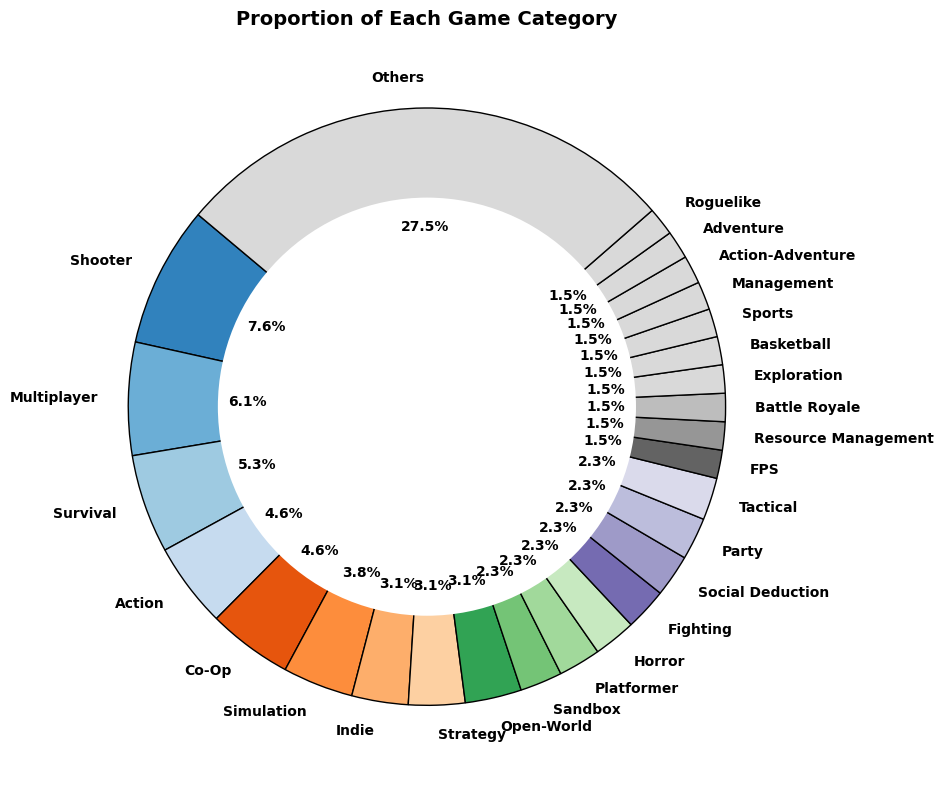

In [19]:
# @title Categories



# Load the dataset
url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/FinalDataSetcsvUTF-8.csv"
df = pd.read_csv(url)

# Combine categories from Category1, Category2, and Category3
all_categories = pd.concat([df['Category1'], df['Category2'], df['Category3']])

# Remove empty or NaN values
all_categories = all_categories.dropna()

# Count the occurrences of each category
category_counts = all_categories.value_counts()

# Calculate proportions
category_proportions = category_counts / category_counts.sum()

# Group small categories into "Others"
threshold = 0.015  # 1.5%
large_categories = category_proportions[category_proportions > threshold]
small_categories = category_proportions[category_proportions <= threshold]

# Add "Others" category
large_categories["Others"] = small_categories.sum()

# Plot the donut chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20c(range(len(large_categories)))

# Create the pie chart with borders
wedges, texts, autotexts = plt.pie(
    large_categories,
    labels=large_categories.index,
    autopct=lambda p: f'{p:.1f}%' if p > threshold * 100 else '',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'black'}  # Add black borders
)

# Add a circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adjust "Others" labeling
for i, label in enumerate(large_categories.index):
    if label == "Others":
        autotexts[i].set_color("black")
        autotexts[i].set_weight("bold")

# Add a title
plt.title('Proportion of Each Game Category', fontsize=14, fontweight='bold')

# Display the chart
plt.tight_layout()
plt.show()

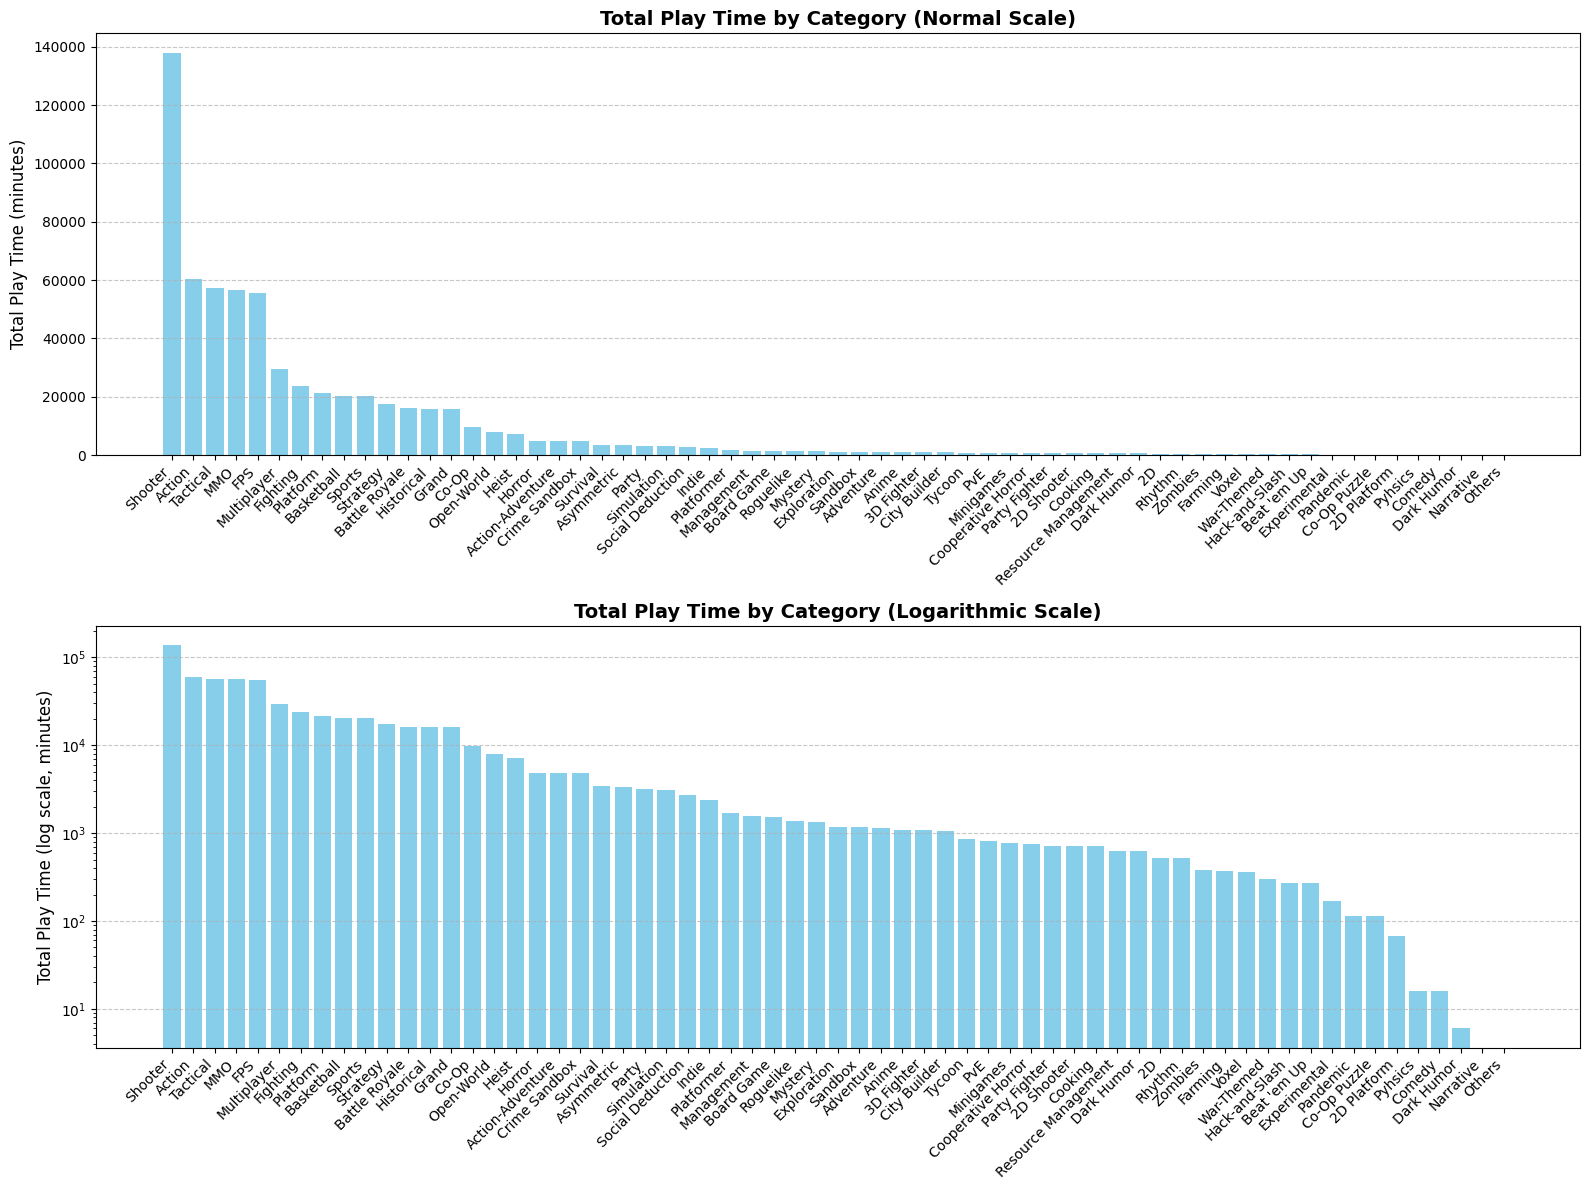

In [21]:

# Load the dataset from a URL
url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/FinalDataSetcsvUTF-8.csv"
df = pd.read_csv(url)

# Combine all category columns into a single series
all_categories = pd.concat([df['Category1'], df['Category2'], df['Category3']])

# Count occurrences of each category
category_counts = all_categories.value_counts()

# Separate categories into large (>=1 occurrences) and small (<1 occurrences)
large_categories = category_counts[category_counts >= 1].index
small_categories = category_counts[category_counts < 1].index

# Filter the dataset for large categories and calculate playtime
play_time_by_category = {}
for category in large_categories:
    play_time_by_category[category] = df[
        (df['Category1'] == category) |
        (df['Category2'] == category) |
        (df['Category3'] == category)
    ]['Play Time (min)'].sum()

# Calculate playtime for "Others" (small categories)
play_time_by_category["Others"] = df[
    (df['Category1'].isin(small_categories)) |
    (df['Category2'].isin(small_categories)) |
    (df['Category3'].isin(small_categories))
]['Play Time (min)'].sum()

# Sort categories by playtime for better visualization
sorted_play_time = dict(sorted(play_time_by_category.items(), key=lambda item: item[1], reverse=True))

# Plotting both normal scale and log scale visualizations
plt.figure(figsize=(16, 12))

# Plot 1: Normal Scale
plt.subplot(2, 1, 1)
plt.bar(list(sorted_play_time.keys()), list(sorted_play_time.values()), color='skyblue')
plt.ylabel('Total Play Time (minutes)', fontsize=12)
plt.title('Total Play Time by Category (Normal Scale)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Logarithmic Scale
plt.subplot(2, 1, 2)
plt.bar(list(sorted_play_time.keys()), list(sorted_play_time.values()), color='skyblue')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Total Play Time (log scale, minutes)', fontsize=12)
plt.title('Total Play Time by Category (Logarithmic Scale)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display both charts
plt.show()


This code analyzes and visualizes the total playtime for various game categories from the dataset. It combines category columns into a single series, counts occurrences, and separates categories into "large" (frequently occurring) and "small" (less frequent). The total playtime for each category is calculated, and small categories are grouped under "Others." The data is sorted by playtime, and a horizontal bar chart is created to display the results. The chart showcases categories on the y-axis and total playtime on the x-axis.

Since observing the data in normal scale as there are more data with smaller values, I also added a chart using logarithmic scale since I thought it would make visual observing a lot easier.

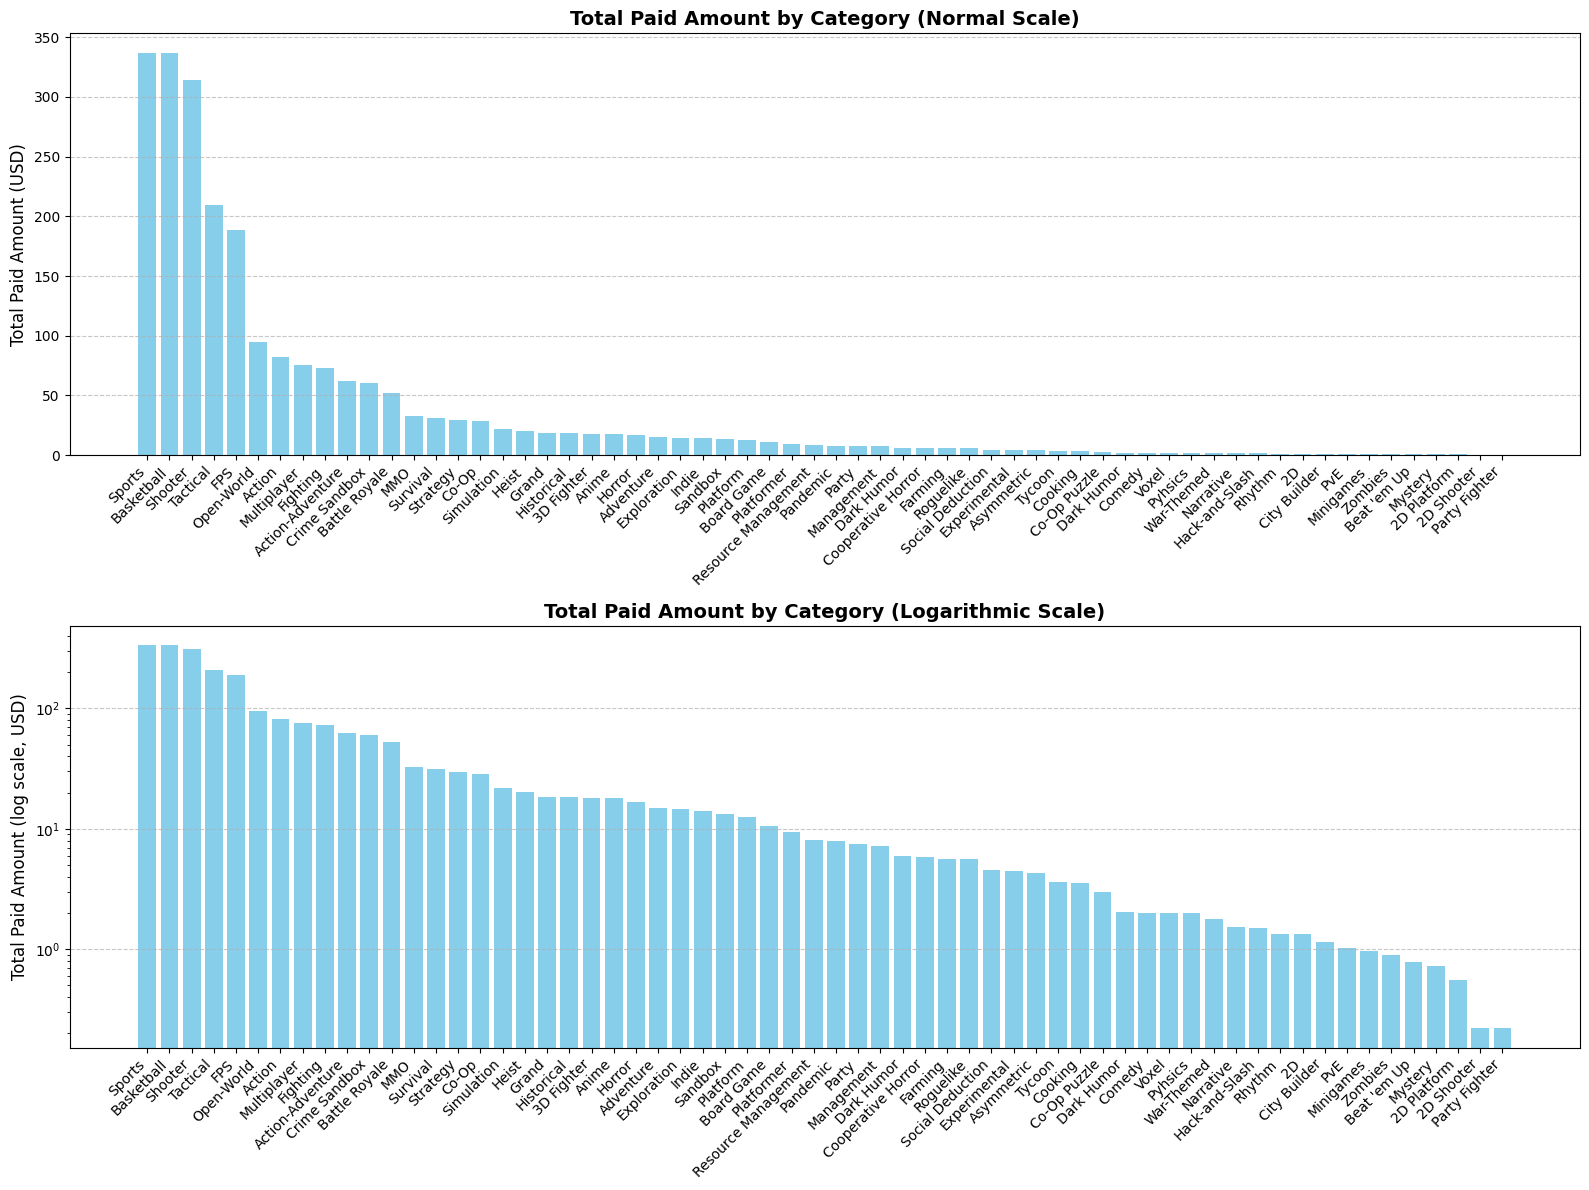

In [22]:

# Load the dataset from a local file or URL
url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/FinalDataSetcsvUTF-8.csv"
df = pd.read_csv(url)

# Combine all category columns into a single series and drop NaN values
all_categories = pd.concat([df['Category1'], df['Category2'], df['Category3']]).dropna()

# Filter out non-string categories
all_categories = all_categories[all_categories.apply(lambda x: isinstance(x, str))]

# Calculate the total paid amount (USD) for each category across all category columns
usd_by_category = {}
for category in all_categories.unique():
    total_spent = df[
        (df['Category1'] == category) |
        (df['Category2'] == category) |
        (df['Category3'] == category)
    ]['Total Spent (USD)'].sum()
    usd_by_category[category] = total_spent

# Sort categories by total USD spent
usd_by_category = dict(sorted(usd_by_category.items(), key=lambda x: x[1], reverse=True))

# Plotting both normal scale and log scale visualizations
plt.figure(figsize=(16, 12))

# Plot 1: Normal Scale
plt.subplot(2, 1, 1)
plt.bar(usd_by_category.keys(), usd_by_category.values(), color='skyblue')
plt.ylabel('Total Paid Amount (USD)', fontsize=12)
plt.title('Total Paid Amount by Category (Normal Scale)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Logarithmic Scale
plt.subplot(2, 1, 2)
plt.bar(usd_by_category.keys(), usd_by_category.values(), color='skyblue')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Total Paid Amount (log scale, USD)', fontsize=12)
plt.title('Total Paid Amount by Category (Logarithmic Scale)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display both charts
plt.show()


This code, building on the previous example, analyzes and visualizes the total amount paid for various game categories within the dataset. The data is sorted by the total amount spent per category, and the results are displayed using horizontal bar charts. Categories are presented on the x-axis, while the total paid amount is shown on the y-axis. To ensure the dataset's robustness and reduce the impact of inflation and currency fluctuations, all values in Turkish Lira (TL) are converted to USD. For instance, purchases made in 2018 are adjusted by dividing the TL amount by the exchange rate of that year and converting it to USD, creating a more consistent dataset.

As in the previous analysis, observing data on a normal scale can be challenging for categories with smaller values. Therefore, a second chart is added using a logarithmic scale, allowing for a more balanced visualization of both smaller and larger values, enhancing the overall clarity of the data.

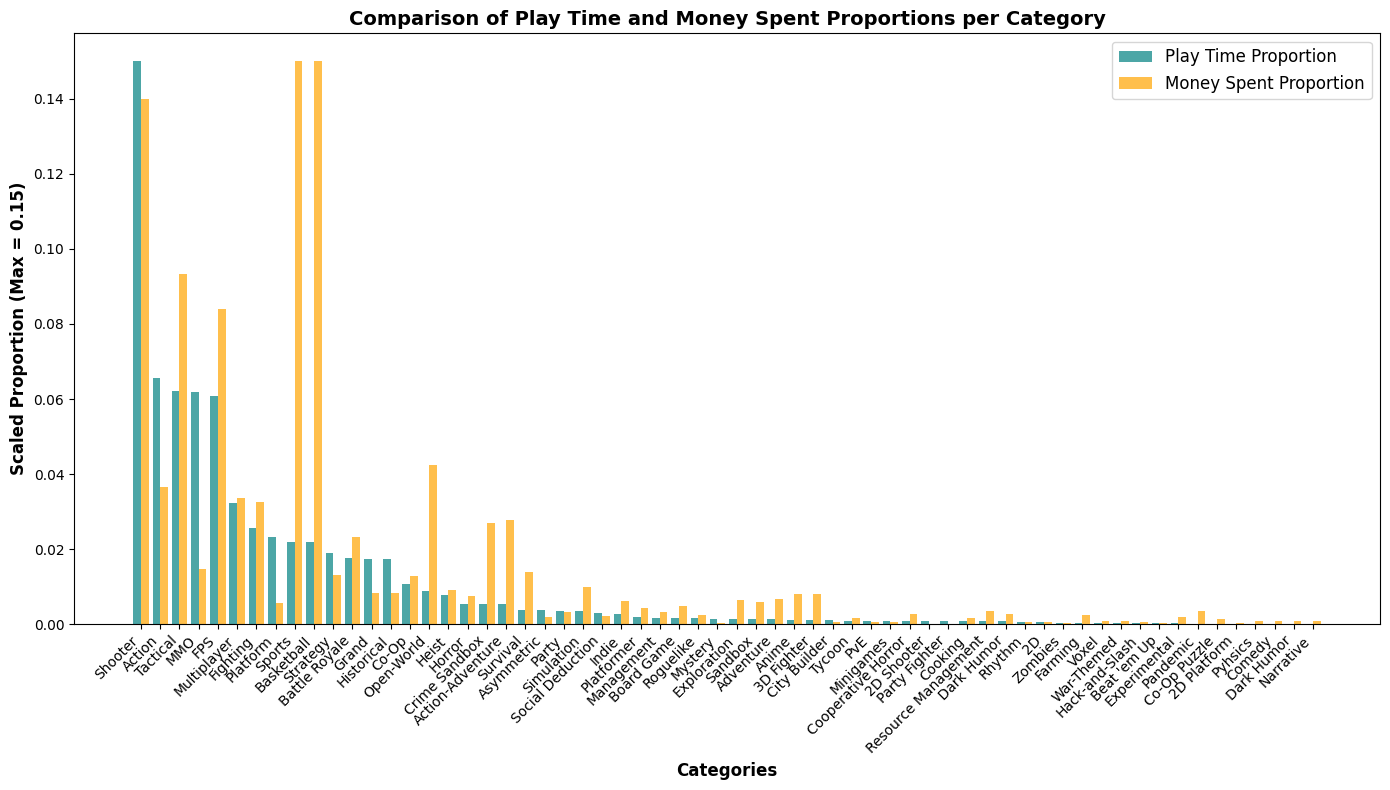

In [23]:
# @title Play time porportion and paid amount proportion for each category
# Load the dataset from a URL
url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/FinalDataSetcsvUTF-8.csv"
df = pd.read_csv(url)

# Melt categories into a single column for aggregation
categories = pd.melt(
    df,
    id_vars=["Total Spent (USD)", "Play Time (min)"],
    value_vars=["Category1", "Category2", "Category3"],
    var_name="Category_Level",
    value_name="Category"
)

# Drop NaN values in the Category column
categories = categories.dropna(subset=["Category"])

# Group by category and calculate totals
category_group = categories.groupby("Category").agg(
    {"Total Spent (USD)": "sum", "Play Time (min)": "sum"}
).reset_index()

# Calculate proportions
total_play_time = category_group["Play Time (min)"].sum()
total_money_spent = category_group["Total Spent (USD)"].sum()

category_group["Play Time Proportion"] = category_group["Play Time (min)"] / total_play_time
category_group["Money Spent Proportion"] = category_group["Total Spent (USD)"] / total_money_spent

# Scale the proportions to a max value of 0.15
category_group["Play Time Proportion"] *= 0.15 / category_group["Play Time Proportion"].max()
category_group["Money Spent Proportion"] *= 0.15 / category_group["Money Spent Proportion"].max()

# Sort by play time proportion
category_group = category_group.sort_values(by="Play Time Proportion", ascending=False)

# Visualization: Grouped Bar Chart
plt.figure(figsize=(14, 8))
bar_width = 0.4
indices = np.arange(len(category_group))

# Bar plots
plt.bar(indices - bar_width / 2, category_group["Play Time Proportion"], bar_width, label="Play Time Proportion", color="teal", alpha=0.7)
plt.bar(indices + bar_width / 2, category_group["Money Spent Proportion"], bar_width, label="Money Spent Proportion", color="orange", alpha=0.7)

# Add labels, title, and legend
plt.xlabel("Categories", fontsize=12, fontweight="bold")
plt.ylabel("Scaled Proportion (Max = 0.15)", fontsize=12, fontweight="bold")
plt.title("Comparison of Play Time and Money Spent Proportions per Category", fontsize=14, fontweight="bold")
plt.xticks(indices, category_group["Category"], rotation=45, ha="right", fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the chart
plt.show()


This code analyzes and visualizes the proportions of playtime and money spent across different game categories. First, it reshapes the dataset to unite category columns into a single column, enabling aggregation by category. It calculates the total playtime and total money spent for each category and computes their proportions relative to the overall totals. To enhance visualization, these proportions are scaled to a maximum value of 0.15. A grouped bar chart displays these results, with categories on the x-axis and scaled proportions on the y-axis. The chart highlights differences in playtime and spending habits for each category, providing actionable insights. You can use bar charts above and this proportion chart in order to visually observe the differences.

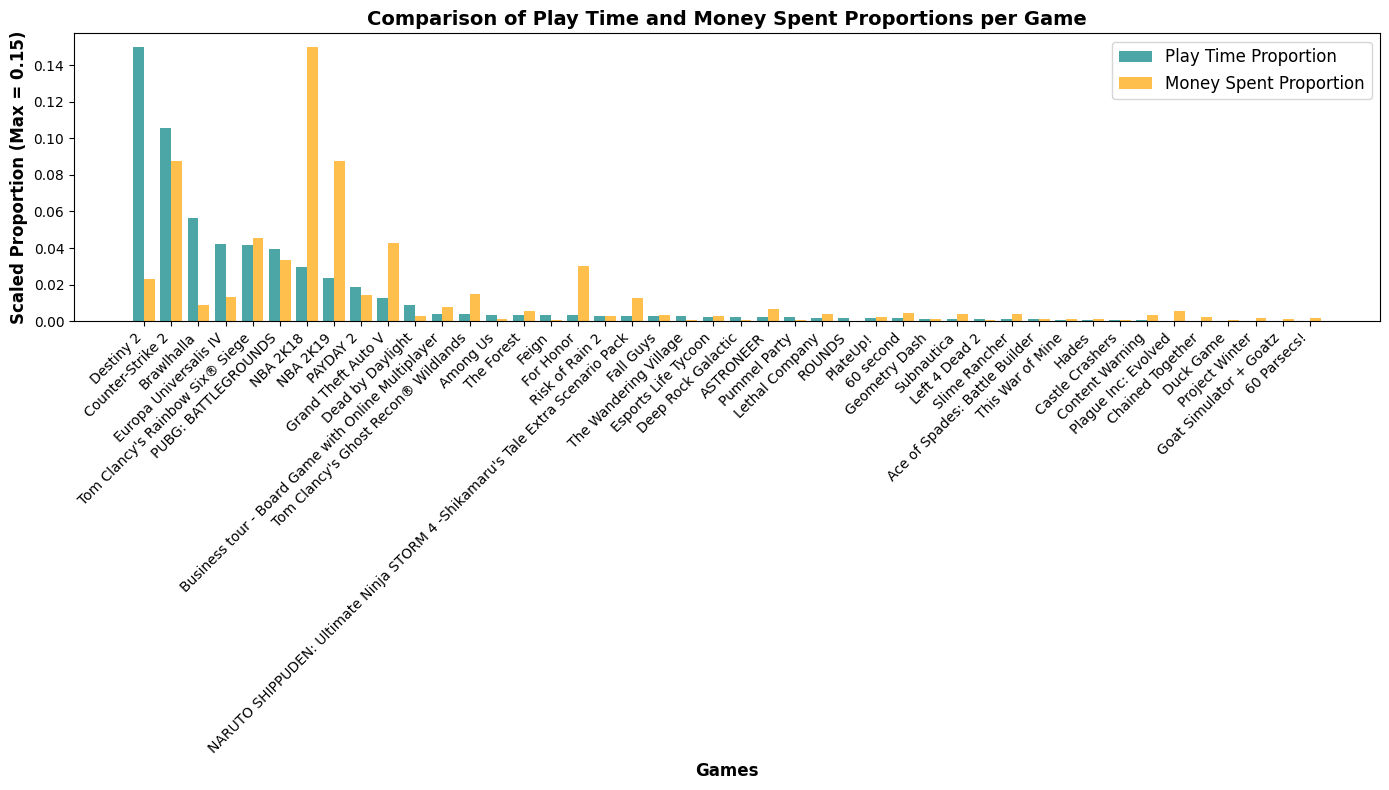

In [24]:
# @title Play time porportion and paid amount proportion for each game


# Load the dataset from a local file or URL
url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/FinalDataSetcsvUTF-8.csv"
df = pd.read_csv(url)

# Exclude games with play time equal to 0 and "Total"
df = df[(df['Play Time (min)'] > 0) & (df['Name'] != 'Totals')]

# Calculate total play time and total money spent
total_play_time = df['Play Time (min)'].sum()
total_money_spent = df['Total Spent (USD)'].sum()

# Calculate proportions for each game
df['Play Time Proportion'] = df['Play Time (min)'] / total_play_time
df['Money Spent Proportion'] = df['Total Spent (USD)'] / total_money_spent

# Scale the proportions to a max value of 0.15
df['Play Time Proportion'] = df['Play Time Proportion'] * (0.15 / df['Play Time Proportion'].max())
df['Money Spent Proportion'] = df['Money Spent Proportion'] * (0.15 / df['Money Spent Proportion'].max())

# Sort games by play time proportion for better visualization
df = df.sort_values(by='Play Time Proportion', ascending=False)

# Visualization: Grouped Bar Chart
plt.figure(figsize=(14, 8))
bar_width = 0.4
indices = np.arange(len(df))

# Bar plots
plt.bar(indices - bar_width / 2, df['Play Time Proportion'], bar_width, label='Play Time Proportion', color='teal', alpha=0.7)
plt.bar(indices + bar_width / 2, df['Money Spent Proportion'], bar_width, label='Money Spent Proportion', color='orange', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Games', fontsize=12, fontweight='bold')
plt.ylabel('Scaled Proportion (Max = 0.15)', fontsize=12, fontweight='bold')
plt.title('Comparison of Play Time and Money Spent Proportions per Game', fontsize=14, fontweight='bold')
plt.xticks(indices, df['Name'], rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the chart
plt.show()

<ipython-input-25-7976e4d25f00>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Optional fine-tuning of layout


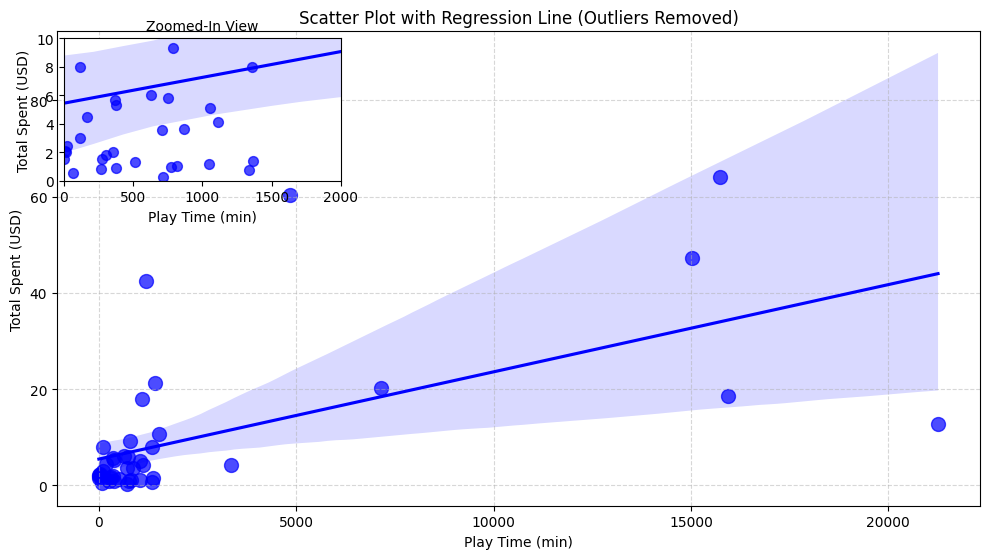

P-Value: 6.747868801489298e-05
Correlation Coefficient (R-value): 0.5812446699057807


In [25]:
# @title Hypothesis 1


# Load the dataset
url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/FinalDataSetcsvUTF-8.csv"
df = pd.read_csv(url)

# Define thresholds for outliers (95th percentile)
play_time_threshold = df['Play Time (min)'].quantile(0.95)
spent_threshold = df['Total Spent (USD)'].quantile(0.95)

# Filter out the outlier data points
filtered_df = df[(df['Play Time (min)'] <= play_time_threshold) & (df['Total Spent (USD)'] <= spent_threshold)]

# Create the main scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='Play Time (min)', y='Total Spent (USD)', data=filtered_df, color='blue', scatter_kws={'s': 100, 'alpha': 0.7}, ax=ax)
ax.set_xlabel('Play Time (min)')
ax.set_ylabel('Total Spent (USD)')
ax.set_title('Scatter Plot with Regression Line (Outliers Removed)')
ax.grid(True, linestyle='--', alpha=0.5)

# Add a zoomed-in inset plot
ax_inset = inset_axes(ax, width="30%", height="30%", loc="upper left")
sns.regplot(x='Play Time (min)', y='Total Spent (USD)', data=filtered_df, color='blue', scatter_kws={'s': 50, 'alpha': 0.7}, ax=ax_inset)

# Set the zoomed-in limits for the inset (focus on bottom-left region)
ax_inset.set_xlim(0, 2000)  # Adjust zoom range for Play Time
ax_inset.set_ylim(0, 10)    # Adjust zoom range for Total Spent
ax_inset.set_title('Zoomed-In View', fontsize=10)

# Use constrained_layout instead of tight_layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Optional fine-tuning of layout
plt.show()

# Define thresholds for outliers (95th percentile)
play_time_threshold = df['Play Time (min)'].quantile(0.95)
spent_threshold = df['Total Spent (USD)'].quantile(0.95)

# Filter out the outlier data points
filtered_df = df[(df['Play Time (min)'] <= play_time_threshold) & (df['Total Spent (USD)'] <= spent_threshold)]

# Extract the relevant columns for the hypothesis test
x = filtered_df['Total Spent (USD)']
y = filtered_df['Play Time (min)']

# Perform linear regression to test the hypothesis
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Output the results
print(f"P-Value: {p_value}")
print(f"Correlation Coefficient (R-value): {r_value}")


Null Hypothesis (H₀):
There is no relationship between the amount spent on games and the playtime. In other words, spending more does not correlate with longer playtimes.

Alternate Hypothesis (H₁):
Games that cost more are associated with longer playtimes, there is a positive correlation between spending and playtime.

The p-value(p=0.0000675) is extremely small, much smaller than the common significance level (α = 0.05).This means the observed correlation is statistically significant, and we reject the null hypothesis (H₀). The probability of observing this relationship by chance is very low, supporting the alternate hypothesis.The positive R-value indicates a moderate positive correlation between the amount spent on games and playtime.
Interpretation: Spending more is associated with longer playtimes, though the relationship is not perfect (R = 1 would indicate a perfect linear correlation).

The regression line shows a positive slope, indicating that as spending increases, playtime also tends to increase.
While the scatter points show some variability, the overall trend supports the hypothesis of a positive relationship.  

The inset highlights the dense cluster of data points for lower spending and playtime values.
Within this region, the trend of higher spending leading to slightly longer playtimes still holds.

With a very low p-value and a moderate positive correlation coefficient, we reject the null hypothesis (H₀).
The evidence suggests that spending more on games is associated with longer playtimes

<ipython-input-26-760ad442c80f>:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


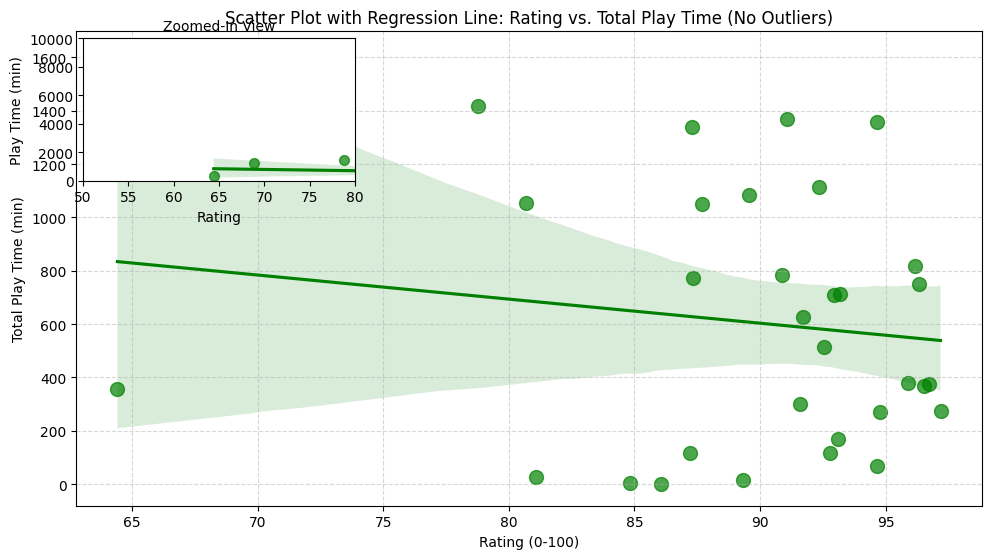

P-Value: 0.4140873297543559
Correlation Coefficient (R-value): -0.14951170548205964


In [26]:
# @title Hypothesis 2


# Load the dataset
url = "https://raw.githubusercontent.com/YavuzCanAtalay/DSA210_TermProject/refs/heads/main/DataFile/FinalDataSetcsvUTF-8.csv"
df = pd.read_csv(url)

# Filter the data to ensure the Rating is between 0 and 100
filtered_df = df[(df['Rating'] >= 0) & (df['Rating'] <= 100)]

# Define thresholds for outlier elimination based on the IQR method
q1_rating = filtered_df['Rating'].quantile(0.25)
q3_rating = filtered_df['Rating'].quantile(0.75)
iqr_rating = q3_rating - q1_rating

q1_playtime = filtered_df['Play Time (min)'].quantile(0.25)
q3_playtime = filtered_df['Play Time (min)'].quantile(0.75)
iqr_playtime = q3_playtime - q1_playtime

# Define lower and upper bounds for filtering
lower_rating = q1_rating - 1.5 * iqr_rating
upper_rating = q3_rating + 1.5 * iqr_rating

lower_playtime = q1_playtime - 1.5 * iqr_playtime
upper_playtime = q3_playtime + 1.5 * iqr_playtime

# Filter the data to eliminate outliers
filtered_df_no_outliers = filtered_df[
    (filtered_df['Rating'] >= lower_rating) & (filtered_df['Rating'] <= upper_rating) &
    (filtered_df['Play Time (min)'] >= lower_playtime) & (filtered_df['Play Time (min)'] <= upper_playtime)
]

# Extract relevant columns for the hypothesis test
ratings_no_outliers = filtered_df_no_outliers['Rating']
play_time_no_outliers = filtered_df_no_outliers['Play Time (min)']

# Perform linear regression to test the hypothesis
slope, intercept, r_value, p_value, std_err = linregress(ratings_no_outliers, play_time_no_outliers)

# Create the main scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x=ratings_no_outliers, y=play_time_no_outliers, color='green', scatter_kws={'s': 100, 'alpha': 0.7}, ax=ax)
ax.set_xlabel('Rating (0-100)')
ax.set_ylabel('Total Play Time (min)')
ax.set_title('Scatter Plot with Regression Line: Rating vs. Total Play Time (No Outliers)')
ax.grid(True, linestyle='--', alpha=0.5)

# Add a zoomed-in inset plot for the specific range
ax_inset = inset_axes(ax, width="30%", height="30%", loc="upper left")
sns.regplot(x=ratings_no_outliers, y=play_time_no_outliers, color='green', scatter_kws={'s': 50, 'alpha': 0.7}, ax=ax_inset)

# Set the zoomed-in limits for the inset
ax_inset.set_xlim(50, 80)       # Adjust the zoom range for Rating
ax_inset.set_ylim(0, 10000)     # Adjust the zoom range for Play Time
ax_inset.set_title('Zoomed-In View', fontsize=10)

# Use constrained layout to ensure everything fits well
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Output the regression results
print(f"P-Value: {p_value}")
print(f"Correlation Coefficient (R-value): {r_value}")


This code analyzes the relationship between game ratings (0–100) and total playtime (in minutes) by performing a linear regression after removing outliers. The outliers are filtered using the interquartile range (IQR) method for both ratings and playtime. A scatter plot with a regression line visualizes the relationship, while an inset provides a zoomed-in view of the lower rating range (50–80).

Null Hypothesis (H₀):Games with higher average ratings have a significant correlation with total playtime

Alternate Hypothesis (H₁):games with higher average ratings does not have a significant correlation with total playtime.

The p-value(p=0.4140) is greater than the common significance level (e.g., α = 0.05), indicating that the relationship between game ratings and total playtime is not statistically significant.In conclusion we fail to reject the null hypothesis.There is insufficient evidence to suggest a significant correlation between game ratings and total playtime.

The R-value is negative and weak, suggesting a weak inverse relationship (higher ratings are weakly associated with lower playtimes)The regression line has a slight downward slope, which aligns with the weak negative correlation.The primary chart shows a weak negative correlation, indicated by a correlation coefficient (R-value) of approximately -0.15 and a P-value of 0.41. The results suggest no strong relationship between higher ratings and playtime. The inset emphasizes low-rated games with varying playtimes.



In Conclusion:This analysis aimed to explore relationships within game data, focusing on metrics like playtime, money spent, ratings, categoriesand release date. Using visualizations and statistical tests, several hypotheses were examined.

The relationship between game rating and total playtime revealed a weak negative correlation, with a p-value of 0.41 and an R-value of -0.15. This indicates no statistically significant relationship between higher ratings and longer playtime. Another hypothesis,  proportional analysis of amount paid and play time revealed disparities between time and money spent across categories, emphasizing differences in value perceptions.

The hypothesis examining whether higher total paid amounts correlate with more playtime yielded a weak negative correlation (R-value: -0.12) and a p-value of 0.47, suggesting no significant relationship. This underscores that spending more on games does not necessarily lead to higher engagement..